In [1]:
# 1.Load Python Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale
from statsmodels.multivariate.pca import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\chong\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 2.Load Data & Pre-processing
df = pd.read_csv("Tick_Data_MLR.csv")
df = df.drop(["OBJECTID", "Lat", "Lon", "No Tree Cells", "Tree Cells"], axis=1)
df.columns = ["Temp", "RH", "ELEVATION", "SLOPE", "SOLAR", "TreeCOV", "tick"]
df

,Temp,RH,ELEVATION,SLOPE,SOLAR,TreeCOV,tick
0,25.500000,39.900000,100.629997,60.892002,44.659817,0.203226,0
1,28.300000,39.500000,98.839996,64.898972,997.440186,0.432526,2
2,27.000000,41.800000,98.939995,71.103600,35.902763,0.275081,6
3,25.800000,40.300000,99.149994,70.031944,464.307526,0.161290,6
4,26.500000,39.200000,96.549995,77.313042,16.261574,0.506369,3
5,24.400000,38.000000,95.599998,77.345489,26.964746,0.513661,5
6,25.200000,41.400000,93.449997,44.827312,10.774117,0.364516,4
7,26.200000,39.400000,91.379997,84.045372,169.416290,0.504762,0
8,24.300000,40.100000,90.919998,85.298943,1145.103882,0.485849,1
9,26.000000,38.800000,91.399994,81.752235,8.286548,0.515152,2


In [3]:
# 3.Define Global Variables
res = ["tick"]
ind = ["Temp", "RH", "ELEVATION", "SLOPE", "SOLAR", "TreeCOV"]

vif_cutoff = 5
pvalue_cutoff = 0.05

In [4]:
# 4.Variable Constructor
def Var_Builder(df, dep_y, ind_x):
    y = df[dep_y]
    X = df[ind_x]
    return(y, X)
y, X = Var_Builder(df, res, ind)

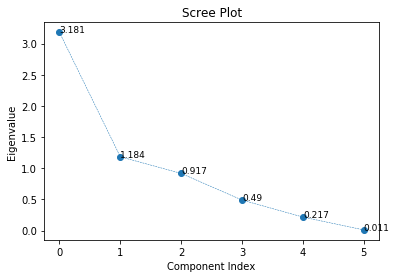

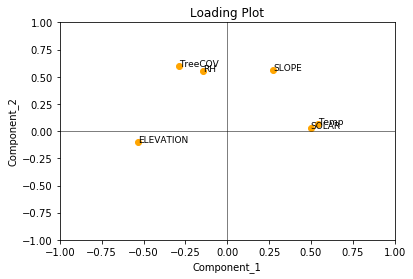

In [5]:
# 5A.Perform Principle Component Analysis
def PCA_Analysis(X):
    var_num = X.shape[1] # Count number of variables involved in PCA
    
    # Initialize PCA
    pca = PCA(X, ncomp=var_num)
    
    # 5A.Compute Eigenvalue Matrix
    eigen_Mat = DataFrame(0, columns=["Eigenvalue", "Variance"], index=np.arange(var_num))
    eigen_Mat["Variance"] = pca.eigenvals / sum(pca.eigenvals)
    eigen_Mat["Eigenvalue"] = pca.eigenvals / sum(pca.eigenvals) * var_num
    
    # 5B.Compute Component Matrix
    ldings = pca.loadings
    comp_Mat = ldings[ldings.columns[0:2]] # Use 2 principle components
    comp_Mat.columns = ["Component_1", "Component_2"]
    return(eigen_Mat, comp_Mat)
scr, ld = PCA_Analysis(X)

# 5B.PCA Result Visualization: Scree Plot & Loading Plot
def PCA_Visualization(eigen_Mat, comp_Mat):
    # Scree Plot
    fig, ax = plt.subplots()
    ax.plot(eigen_Mat.index, eigen_Mat["Eigenvalue"], "--o", linewidth=0.5)
    for i in eigen_Mat.index:
        ax.annotate(round(eigen_Mat.loc[i, "Eigenvalue"], 3), [i, eigen_Mat.loc[i, "Eigenvalue"]], fontsize=9)
    plt.xlabel("Component Index")
    plt.ylabel("Eigenvalue")
    plt.title("Scree Plot")
    fig.savefig("ScreePlot.png", dpi=300)
    plt.show()
    
    # Loading Plot
    fig, ax = plt.subplots()
    ax.scatter(comp_Mat["Component_1"], comp_Mat["Component_2"], color="orange")
    for i in comp_Mat.index:
        ax.annotate(i, [comp_Mat.loc[i, "Component_1"], comp_Mat.loc[i, "Component_2"]], fontsize=9)
    ax.plot([-1.1, 1.1], [0, 0], "k-", linewidth=0.5)
    ax.plot([0, 0], [-1.1, 1.1], "k-", linewidth=0.5)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Component_1")
    plt.ylabel("Component_2")
    plt.title("Loading Plot")
    fig.savefig("LoadingPlot.png", dpi=300)
    plt.show()
PCA_Visualization(scr, ld)

In [6]:
# 6.Multiple Regression Model Calibration
def MLR(dep, ind):
    # Fit a MLR Model
    y = dep
    X = sm.add_constant(ind)
    model = sm.OLS(y, X).fit()
    # Produce R-square
    r2 = model.rsquared
    # Produce P-value
    pvalue = model.pvalues
    # Produce Parameters
    params = model.params
    # Produce VIF
    vif = DataFrame(0, index = ind.columns, columns=["Tolerance", "VIF"])
    for var in vif.index:
        try:
            vif.loc[var, "VIF"] = variance_inflation_factor(scale(ind), np.where(vif.index == var)[0])
        except:
            vif.loc[var, "VIF"] = 1.0
    vif["Tolerance"] = 1 / vif["VIF"]
    return(r2, pvalue, vif, params)
r2, pvalue, vif, params = MLR(y, X)

In [7]:
# 7.Merge pvalue table & collinearity diagnostic table
summ_tab = pd.merge(DataFrame(pvalue, columns=["pvalue"]), vif, left_index=True, right_index=True)
summ_tab.to_csv("MLR_summ1.csv")
summ_tab

,pvalue,Tolerance,VIF
Temp,0.258266,0.021214,47.137878
RH,0.202161,0.685932,1.457870
ELEVATION,0.998081,0.022109,45.229624
SLOPE,0.816833,0.722285,1.384496
SOLAR,0.683256,0.320885,3.116377
TreeCOV,0.919851,0.671179,1.489915


In [8]:
# 8.Remove one of collinear variables "Temp" or "ELEVATION", recalibrate MLR model

# 8A.Remove variable "Temp"
res_1 = ["tick"]
ind_1 = ["RH", "ELEVATION", "SLOPE", "SOLAR", "TreeCOV"]

y1, X1 = Var_Builder(df, res_1, ind_1)
r2_1, pvalue_1, vif_1, params_1 = MLR(y1, X1)
summ_tab_1 = pd.merge(DataFrame(pvalue_1, columns=["pvalue"]), vif_1, left_index=True, right_index=True)
summ_tab_1.to_csv("MLR_summ2.csv")

# 8B.Remove variable "ELEVATION"
res_2 = ["tick"]
ind_2 = ["Temp", "RH", "SLOPE", "SOLAR", "TreeCOV"]

y2, X2 = Var_Builder(df, res_2, ind_2)
r2_2, pvalue_2, vif_2, params_2 = MLR(y2, X2)
summ_tab_2 = pd.merge(DataFrame(pvalue_2, columns=["pvalue"]), vif_2, left_index=True, right_index=True)
summ_tab_2.to_csv("MLR_summ3.csv")

In [9]:
print(r2_1)
summ_tab_1

0.586277736061


,pvalue,Tolerance,VIF
RH,0.070272,0.798989,1.251582
ELEVATION,0.000247,0.292864,3.414548
SLOPE,0.631749,0.755588,1.323473
SOLAR,0.738754,0.322253,3.103152
TreeCOV,0.760436,0.692681,1.443666


In [10]:
print(r2_2)
summ_tab_2

0.599127985728


,pvalue,Tolerance,VIF
Temp,0.000123,0.281009,3.558609
RH,0.150277,0.857192,1.166600
SLOPE,0.813182,0.735883,1.358912
SOLAR,0.676880,0.327198,3.056250
TreeCOV,0.918834,0.673815,1.484087
